In [ ]:
from Industrial_robot import IndustrialRobot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#uncomment if you want 3d rotatable plots
# %matplotlib widget

In [2]:
robot ={0:'xy,z,0.22',
        1:'xz,z,0.18',
        2:'xz,z,0.36',
        3:'yz,x,0.2',
        4:'xz,x,0.165',
        5:'yz,x,0.08',
        6:'ee,x,0.0001'}
test = IndustrialRobot(robot)


In [ ]:

obj = pd.read_csv('/home/thijssnel/programeren/jaar_4/ip/test_meting_robot.csv')
obj['Distance'] = obj['Distance']/1000

obj_list =[(i[1]['Distance'],i[1]['H_Angle'],i[1]['V_Angle']) for i in obj.iterrows()]

In [4]:
obj_list

[(0.562, 21.7602735022976, 3.61702127659575),
 (0.561, 21.7602735022976, 3.61702127659575),
 (0.564, 18.99706416867251, 2.9078014184397176),
 (0.564, 19.135224635353765, 3.191489361702132),
 (0.563, 18.72074323531, 2.9078014184397176),
 (0.564, 22.451075835703875, 3.758865248226954),
 (0.563, 22.451075835703875, 3.758865248226954),
 (0.562, 18.72074323531, 2.9078014184397176),
 (0.563, 18.72074323531, 2.9078014184397176),
 (0.563, 22.451075835703875, 3.758865248226954),
 (0.563, 21.207631635572582, 3.900709219858157),
 (0.563, 21.207631635572582, 3.900709219858157),
 (0.562, 22.451075835703875, 3.758865248226954),
 (0.562, 20.516829302166308, 3.758865248226954),
 (0.563, 22.451075835703875, 3.758865248226954),
 (0.564, 22.451075835703875, 3.758865248226954),
 (0.564, 19.135224635353765, 2.9078014184397176),
 (0.565, 22.451075835703875, 3.758865248226954),
 (0.562, 22.451075835703875, 3.758865248226954),
 (0.563, 22.451075835703875, 3.758865248226954),
 (0.564, 22.451075835703875, 3.758

In [ ]:
test.plot_robot()

In [ ]:
test.update_objects(objects=obj_list,correction=[-0.1,-0.30,0.01], direction='x')

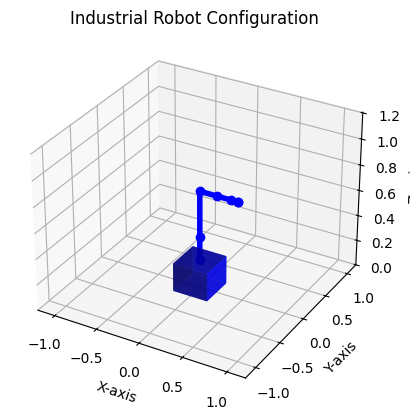

<Figure size 640x480 with 0 Axes>

In [ ]:
test.plot_robot()


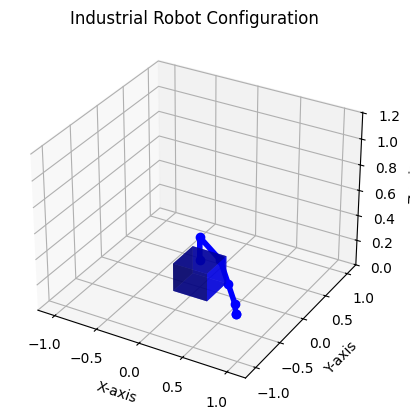

In [8]:
value = [-0.42786505998203384, 1.7451330134956284, -0.9493224010472553, -0.008433662209142791, 0.5158762442704572, -0.9145525280450286]
for i,val in enumerate(value):
    setattr(test, f'q{i+1}_val',val)

test.plot_robot()
pos = [getattr(test,f'q{i+1}_car') for i in range(7)]

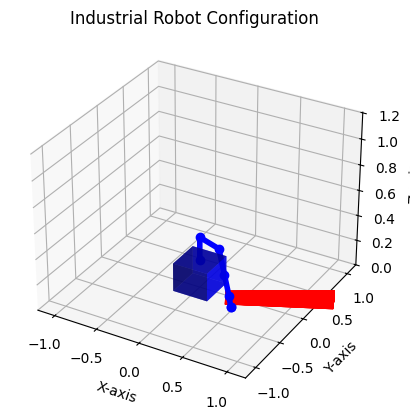

Destination reached in 6.9 seconds.
0.41782366013560157 1.5801935091104737 -0.6866578823560304 0.14224264602124856 0.003149107899358039 -1.0243106230065118
[ 0.00066727 -0.00094926 -0.00018611]


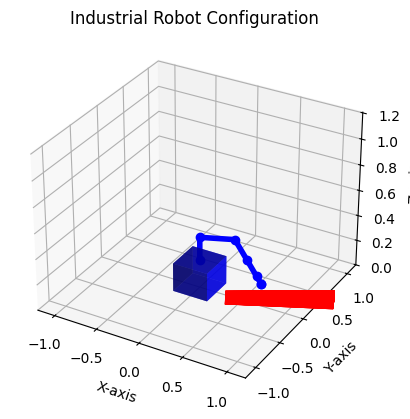

In [27]:
value = [-0.48237, 1.48562, -0.47743, 0.09515, 0.19313, -1.09862]
for i,val in enumerate(value):
    setattr(test, f'q{i+1}_val',val)
test.plot_robot()

full_path = {}
i = 0

# ---- FIRST DESTINATION ----
test.path = {}   # <--- IMPORTANT: clear before generating a new path
test.get_to_destination(destination=[0.583, 0.260, 0.05, 0., 0., 0.], dt=1/10,attractive_coff=1,repelent_object=0.0001,range_repelent=0.1)
for _, path in test.path.items():
    full_path[i] = path
    i += 1

print(test.q1_val, test.q2_val, test.q3_val, test.q4_val, test.q5_val, test.q6_val)
print(test.q7_car[:3]-[0.583, 0.260, 0.05,])
test.plot_robot()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

path = full_path
filename = "industrial_robot_animation.gif"
frames = len(path)

fig = plt.figure(figsize=(12,4))

# ---------------------------------------------------------
# AXIS 1 — Original view
# ---------------------------------------------------------
ax1 = fig.add_subplot(131, projection='3d')
ln1, = ax1.plot([], [], [], '-o', color='blue', linewidth=4, markersize=6)

ax1.set_title("Original View")
ax1.set_xlabel('X-axis'); ax1.set_ylabel('Y-axis'); ax1.set_zlabel('Z-axis')
ax1.grid(True)
max_range = 6
ax1.set_xlim(-test.max_length, test.max_length)
ax1.set_ylim(-test.max_length, test.max_length)
ax1.set_zlim(0, test.max_length/2)
ax1.set_proj_type('ortho')

# for p1, p2 in test.detected_objects:
#     ax1.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='red', linewidth=4)


# ---------------------------------------------------------
# AXIS 2 — YZ plane (camera along +X)
# ---------------------------------------------------------
ax2 = fig.add_subplot(132, projection='3d')
ln2, = ax2.plot([], [], [], '-o', color='blue', linewidth=4, markersize=6)

ax2.set_title("YZ View (Looking along +X)")
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.grid(True)
ax2.set_xlim(-test.max_length, test.max_length)
ax2.set_ylim(+test.max_length, -test.max_length)
ax2.set_zlim(0, test.max_length/2)

# rotate view: look along +X axis
ax2.view_init(elev=0, azim=90)

# for p1, p2 in test.detected_objects:
#     ax2.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='red', linewidth=4)


# ---------------------------------------------------------
# AXIS 3 — XZ plane (camera along +Y)
# ---------------------------------------------------------
ax3 = fig.add_subplot(133, projection='3d')
ln3, = ax3.plot([], [], [], '-o', color='blue', linewidth=4, markersize=6)

ax3.set_title("XZ View (Looking along +Y)")
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
ax3.grid(True)
ax3.set_xlim(-test.max_length, test.max_length)
ax3.set_ylim(+test.max_length, -test.max_length)
ax3.set_zlim(0, test.max_length/2)

# rotate view: look along +Y axis
ax3.view_init(elev=0, azim=0)

# for p1, p2 in test.detected_objects:
#     ax3.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='red', linewidth=4)


# ---------------------------------------------------------
# UPDATE FUNCTION — update all 3 views
# ---------------------------------------------------------
def update(i):
    x=[path[i][x][0] for x in range(len(path[i]))]
    y=[path[i][y][1] for y in range(len(path[i]))]
    z=[path[i][z][2] for z in range(len(path[i]))]

    # original view
    ln1.set_data(x, y)
    ln1.set_3d_properties(z)

    # yz view
    ln2.set_data(x, y)
    ln2.set_3d_properties(z)

    # xz view
    ln3.set_data(x, y)
    ln3.set_3d_properties(z)

    return ln1, ln2, ln3


ani = FuncAnimation(fig, update, frames=frames, interval=1000/10)
writer = PillowWriter(fps=10)
ani.save(filename, writer=writer)
plt.close(fig)


In [ ]:
import numpy as np

def score_trajectory(robot,
                     destination,
                     attractive=0.5,
                     repellent_gain=0.0001,
                     repellent_range=2.0,
                     lam=1e-4,
                     dt=0.01,
                     max_time=10.0,
                     verbose=False):
    """
    Runs a simulated trajectory with specific parameters and returns a score.
    Lower score = better.

    robot must have:
        - a method get_to_destination_score_mode(...)
        (or you can integrate this evaluator inside get_to_destination)
    """

    # Reset robot configuration if needed
    robot.reset_joints()   # implement yourself if needed

    steps = int(max_time / dt)
    destination = np.array(destination, dtype=float)

    arrival_time = max_time
    final_error = None
    collision_cost = 0.0
    smoothness_cost = 0.0

    prev_q = np.array(robot.get_joint_vector())

    for step in range(steps):

        # --- RUN ONE CONTROL STEP (your modified controller function) ---
        dq = robot.control_step(
            destination=destination,
            attractive=attractive,
            repellent_gain=repellent_gain,
            repellent_range=repellent_range,
            lam=lam,
            dt=dt
        )

        # Apply dq
        robot.apply_dq(dq, dt)

        # --- SMOOTHNESS COST: penalize big joint movements ---
        smoothness_cost += np.sum(dq**2) * dt

        # --- COLLISION COST ---
        # compute all joint positions
        robot.get_joint_position_car()
        qpos = robot.get_joint_cart_positions()  # must return list of 3D points

        # sum penalty if joints are closer than repellent_range
        for i in range(len(qpos)):
            for j in range(i+2, len(qpos)):  # skip adjacent joints
                d = np.linalg.norm(qpos[i] - qpos[j])
                if d < repellent_range:
                    collision_cost += (1.0 / max(d, 1e-6)) * dt

        # --- CHECK TARGET ARRIVAL ---
        ee_pos = robot.q7_car[:3]
        if np.linalg.norm(ee_pos - destination[:3]) < 1e-3:
            arrival_time = step * dt
            break

    # --- FINAL POSITION ERROR ---
    ee_pos = robot.q7_car[:3]
    final_error = np.linalg.norm(ee_pos - destination[:3])

    # --- TOTAL SCORE ---
    # weights are tunable
    score = (
        1.0 * arrival_time +
        50.0 * final_error +
        10.0 * collision_cost +
        0.1 * smoothness_cost
    )

    if verbose:
        print("arrival_time:", arrival_time)
        print("final_error:", final_error)
        print("collision_cost:", collision_cost)
        print("smoothness_cost:", smoothness_cost)
        print("TOTAL SCORE:", score)

    return score, {
        "arrival_time": arrival_time,
        "final_error": final_error,
        "collision_cost": collision_cost,
        "smoothness_cost": smoothness_cost
    }


Clicked: (745, 2512)
Clicked: (866, 2525)
Clicked: (900, 2525)
Clicked: (896, 2525)
Clicked: (905, 2530)
Clicked: (922, 2517)
Clicked: (948, 2517)
Clicked: (961, 2517)
Clicked: (978, 2491)
Clicked: (987, 2487)
Clicked: (1004, 2448)
Clicked: (1025, 2426)
Clicked: (1043, 2392)
Clicked: (1043, 2314)
Clicked: (1081, 2288)
Clicked: (1103, 2219)
Clicked: (1137, 2193)
Clicked: (1198, 2146)
Clicked: (1258, 2142)
Clicked: (1318, 2094)
Clicked: (1396, 2081)
Clicked: (1452, 2047)
Clicked: (1543, 2068)
Clicked: (1547, 2068)
Clicked: (1620, 2064)
Clicked: (1706, 2073)
Clicked: (1767, 2086)
Clicked: (1840, 2107)
Clicked: (1892, 2146)
Clicked: (1939, 2159)
Clicked: (1978, 2198)
Clicked: (2038, 2232)
Clicked: (2064, 2280)
Clicked: (2090, 2284)
Clicked: (2120, 2301)
Clicked: (2150, 2327)
Clicked: (2155, 2340)
Clicked: (2176, 2357)
Clicked: (2193, 2387)
Clicked: (2202, 2400)
Clicked: (2202, 2405)
Clicked: (2232, 2426)
Clicked: (2228, 2443)
Clicked: (2241, 2452)
Clicked: (2250, 2456)
Clicked: (2262, 2461

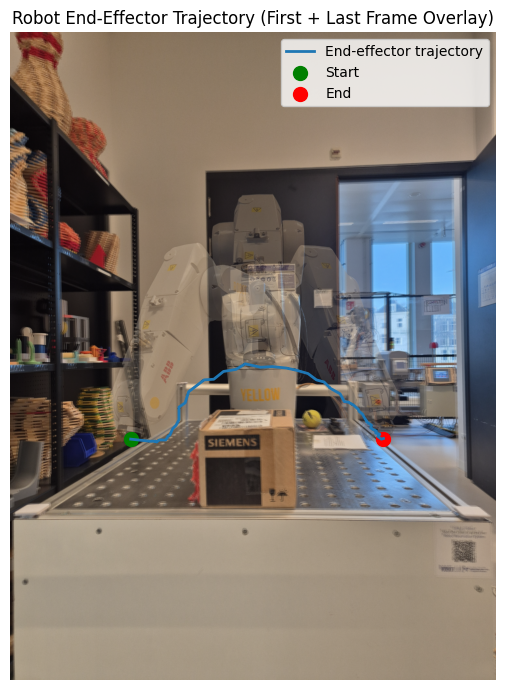

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# -------- CONFIG --------
IMAGE_FOLDER = "/home/thijssnel/programeren/jaar_4/ip/obstacle_png/"
IMAGE_PATTERN = "*.jpg"
ALPHA = 0.5
WINDOW_NAME = "Click End Effector"
# ------------------------

image_files = sorted(glob.glob(IMAGE_FOLDER + IMAGE_PATTERN))
points = []
clicked_point = None

def click_event(event, x, y, flags, param):
    global clicked_point
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_point = (x, y)
        print(f"Clicked: {clicked_point}")

cv2.namedWindow(WINDOW_NAME)
cv2.setMouseCallback(WINDOW_NAME, click_event)

# -------- COLLECT POINTS --------
for i, file in enumerate(image_files):
    img = cv2.imread(file)
    display = img.copy()
    clicked_point = None

    while True:
        temp = display.copy()

        if clicked_point is not None:
            cv2.circle(temp, clicked_point, 6, (0, 0, 255), -1)

        cv2.putText(
            temp,
            f"Frame {i+1}/{len(image_files)} - Click end effector, ENTER to confirm",
            (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (0, 255, 0),
            2
        )

        cv2.imshow(WINDOW_NAME, temp)
        key = cv2.waitKey(20) & 0xFF

        if key == 13 or key == 32:  # ENTER or SPACE
            if clicked_point is not None:
                points.append(clicked_point)
                break

        elif key == 27:  # ESC
            cv2.destroyAllWindows()
            raise SystemExit("Aborted by user")

cv2.destroyAllWindows()

trajectory = np.array(points)

# -------- BLEND FIRST & LAST FRAME --------
first_img = cv2.imread(image_files[0])
middle_img = cv2.imread(image_files[22])
last_img = cv2.imread(image_files[-1])
blend = cv2.addWeighted(first_img, 0.5, middle_img, 0.5, 0)
combined = cv2.addWeighted(blend, 0.7, last_img, 0.3 ,0)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# -------- PLOT --------
plt.figure(figsize=(10, 7))
plt.imshow(combined_rgb)

plt.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    linewidth=2,
    label="End-effector trajectory"
)

# Direction arrows
for i in range(0, len(trajectory) - 1, 4):
    dx = trajectory[i + 1, 0] - trajectory[i, 0]
    dy = trajectory[i + 1, 1] - trajectory[i, 1]
    plt.arrow(
        trajectory[i, 0],
        trajectory[i, 1],
        dx,
        dy,
        head_width=8,
        length_includes_head=True
    )

plt.scatter(*trajectory[0], c="green", s=100, label="Start")
plt.scatter(*trajectory[-1], c="red", s=100, label="End")

plt.title("Robot End-Effector Trajectory (First + Last Frame Overlay)")
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()


Clicked: (741, 2504)
Clicked: (1008, 2525)
Clicked: (1237, 2538)
Clicked: (1431, 2534)
Clicked: (1443, 2543)
Clicked: (1732, 2530)
Clicked: (1784, 2538)
Clicked: (1931, 2521)
Clicked: (2008, 2534)
Clicked: (2073, 2538)
Clicked: (2120, 2543)
Clicked: (2146, 2534)
Clicked: (2155, 2547)
Clicked: (2137, 2547)
Clicked: (2150, 2547)
Clicked: (2189, 2534)
Clicked: (2202, 2556)
Clicked: (2232, 2543)
Clicked: (2250, 2534)
Clicked: (2267, 2530)
Clicked: (2258, 2556)
Clicked: (2288, 2538)


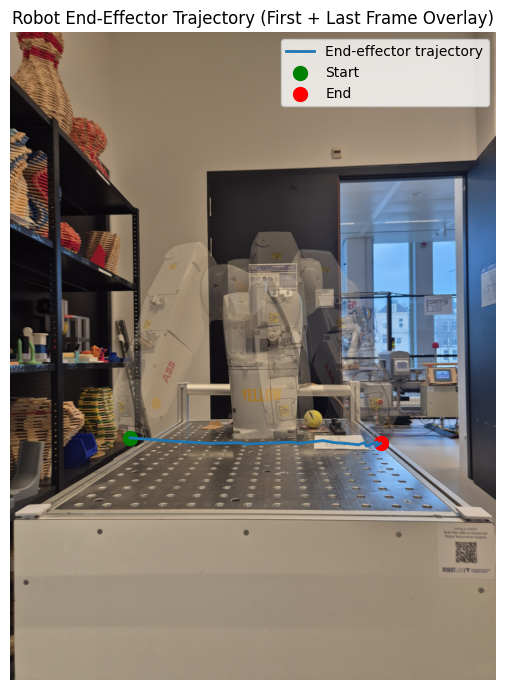

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# -------- CONFIG --------
IMAGE_FOLDER = "/home/thijssnel/programeren/jaar_4/ip/obstacleless_png/"
IMAGE_PATTERN = "*.jpg"
ALPHA = 0.5
WINDOW_NAME = "Click End Effector"
# ------------------------

image_files = sorted(glob.glob(IMAGE_FOLDER + IMAGE_PATTERN))
points = []
clicked_point = None

def click_event(event, x, y, flags, param):
    global clicked_point
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_point = (x, y)
        print(f"Clicked: {clicked_point}")

cv2.namedWindow(WINDOW_NAME)
cv2.setMouseCallback(WINDOW_NAME, click_event)

# -------- COLLECT POINTS --------
for i, file in enumerate(image_files):
    img = cv2.imread(file)
    display = img.copy()
    clicked_point = None

    while True:
        temp = display.copy()

        if clicked_point is not None:
            cv2.circle(temp, clicked_point, 6, (0, 0, 255), -1)

        cv2.putText(
            temp,
            f"Frame {i+1}/{len(image_files)} - Click end effector, ENTER to confirm",
            (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (0, 255, 0),
            2
        )

        cv2.imshow(WINDOW_NAME, temp)
        key = cv2.waitKey(20) & 0xFF

        if key == 13 or key == 32:  # ENTER or SPACE
            if clicked_point is not None:
                points.append(clicked_point)
                break

        elif key == 27:  # ESC
            cv2.destroyAllWindows()
            raise SystemExit("Aborted by user")

cv2.destroyAllWindows()

trajectory = np.array(points)

# -------- BLEND FIRST & LAST FRAME --------
first_img = cv2.imread(image_files[0])
middle_img = cv2.imread(image_files[5])
last_img = cv2.imread(image_files[-1])
blend = cv2.addWeighted(first_img, 0.5, middle_img, 0.5, 0)
combined = cv2.addWeighted(blend, 0.7, last_img, 0.3 ,0)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# -------- PLOT --------
plt.figure(figsize=(10, 7))
plt.imshow(combined_rgb)

plt.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    linewidth=2,
    label="End-effector trajectory"
)

# Direction arrows
for i in range(0, len(trajectory) - 1, 4):
    dx = trajectory[i + 1, 0] - trajectory[i, 0]
    dy = trajectory[i + 1, 1] - trajectory[i, 1]
    plt.arrow(
        trajectory[i, 0],
        trajectory[i, 1],
        dx,
        dy,
        head_width=8,
        length_includes_head=True
    )

plt.scatter(*trajectory[0], c="green", s=100, label="Start")
plt.scatter(*trajectory[-1], c="red", s=100, label="End")

plt.title("Robot End-Effector Trajectory (First + Last Frame Overlay)")
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()